# Social Distancing for coronavirus

See the previous version for comments. This one has

* death
* hospital bed capacity
* initial population has distribution of n_days_infected
* moved code to python file

In [1]:
from matplotlib import pyplot as plt
from covid import social_distancing

# Initial setup

Based on various sources, if we have fully functional hospitals with lots of capacity, your chance of dying once infected is about 2%. Which is terrifyingly high IMO. 

Meanwhile, it seems like you have about a 5% chance of needing to be hospitalized if you have corona virus. If you are hospitalized, you still have a 5% chance of dying. If you're *not* hospitalized but you need to be, you die.

Let's say you have 1000 people, an initial infection chance of 5%, enough hospital beds for about 3 people out of every 1000 (this is about standard for the US). The dashed line represents our hospital bed capacity.

Note that these numbers are pretty bad. If we start with 5% of the population infected, and only 0.3% able to get beds, we basically start over capacity. Which seems reasonable, unfortunately, especially given how close we are to capacity without factoring in coronavirus.

What happens if nobody isolates?

In [2]:
npeople, nsteps = 1000, 300
initial_infection_chance = 0.05

In [3]:
import imp
imp.reload(social_distancing)

<module 'covid.social_distancing' from '/Users/mglerner/coding/covid/covid/social_distancing.py'>

6.2% of people died


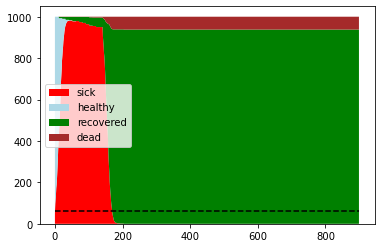

In [4]:
distancing = 0.0
u = social_distancing.Universe(npeople,distancing=distancing,
                               initial_infection_chance=initial_infection_chance,
                               hospital_beds_percent = 0.003,
                              )
u.run(nsteps*3,stop_distancing_at=None)
social_distancing.draw_stacked_plot(u)
print(f'{100*u.data.d[-1]/u.npeople}% of people died')

So that's bad. What if we get huge buyin, and 90% of people agree to flatten the curve?

3.5% of people died


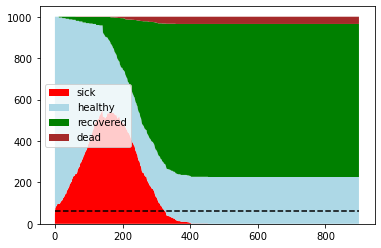

In [5]:
distancing = 0.90
u = social_distancing.Universe(npeople,distancing=distancing,
                               initial_infection_chance=initial_infection_chance,
                               hospital_beds_percent = 0.003,
                              )
u.run(nsteps*3,stop_distancing_at=None)
social_distancing.draw_stacked_plot(u)
print(f'{100*u.data.d[-1]/u.npeople}% of people died')

So that's better! The fact that hospitals, in this model, only make you 2.5x more likely to survive, is pretty rough.

Just for fun, here's a picture of the people in this scenario, which is a denser scenario than before.

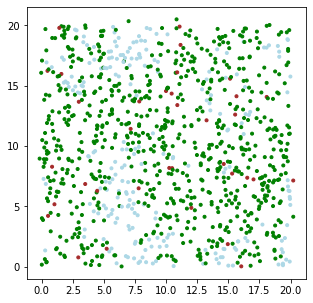

In [6]:
u.draw();

What happens if we stop distancing at around the time when we're back under capacity?

4.3% of people died


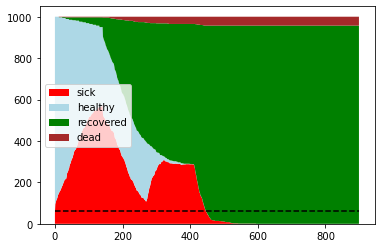

In [10]:
u = social_distancing.Universe(npeople,distancing=distancing,
                               initial_infection_chance=initial_infection_chance,
                               hospital_beds_percent = 0.003,
                              )
u.run(nsteps*3,stop_distancing_at=int(nsteps*0.9))
social_distancing.draw_stacked_plot(u)
print(f'{100*u.data.d[-1]/u.npeople}% of people died')

And that's pretty bad!

What if we wait till we actually are under capacity?

5.4% of people died


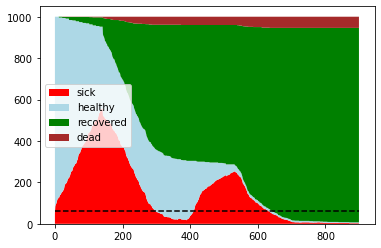

In [12]:
u = social_distancing.Universe(npeople,distancing=distancing,
                               initial_infection_chance=initial_infection_chance,
                               hospital_beds_percent = 0.003,
                              )
u.run(nsteps*3,stop_distancing_at=int(nsteps*1.3))
social_distancing.draw_stacked_plot(u)
print(f'{100*u.data.d[-1]/u.npeople}% of people died')

Obviously there are a ton of parameters, and this is only a very small model. And I it's clear that there's enough spread in the answers that we should run this 100x to get a distribution. If you haven't run this yourself, trust me, there's a lot of spread. 

But the qualitative ideas seem valid. As does the bit where it can easily be just as bad to undistance when you're "almost" done as when you're earlier along.

But it still seems like undistancing too early is pretty bad.